## Q.1. チャネル入れ替え

画像を読み込み、RGBをBGRの順に入れ替えよ。

画像の赤成分を取り出すには、以下のコードで可能。
cv2.imread()関数ではチャネルがBGRの順になることに注意！
これで変数redにimori.jpgの赤成分のみが入る。

```python
import cv2
img = cv2.imread("imori.jpg")
red = img[:, :, 2].copy()
```

|入力 (imori.jpg)|出力 (answers_image/answer_1.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_1.jpg)|

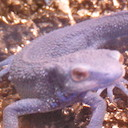

In [1]:
import cv2
import numpy as np
from PIL import Image

# function: BGR -> RGB
def BGR2RGB(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()

    # RGB > BGR
    img[:, :, 0] = r
    img[:, :, 1] = g
    img[:, :, 2] = b

    return img

# Read image
img = cv2.imread("imori.jpg")

# 画像の表示
display(Image.fromarray(img))

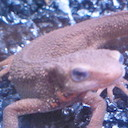

In [2]:
# BGR -> RGB
img2 = BGR2RGB(img)

# 画像の表示
display(Image.fromarray(img2))

## Q.2. グレースケール化

画像をグレースケールにせよ。
グレースケールとは、画像の輝度表現方法の一種であり下式で計算される。

Y = 0.2126 R + 0.7152 G + 0.0722 B

|入力 (imori.jpg)|出力 (answers_image/answer_2.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_2.jpg)|


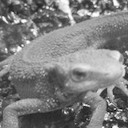

In [3]:
# Gray scale
def BGR2GRAY(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()

    # Gray scale
    out = 0.2126 * r + 0.7152 * g + 0.0722 * b
    out = out.astype(np.uint8)

    return out


# Read image
img = cv2.imread("imori.jpg").astype(float)

# Grayscale
out = BGR2GRAY(img)

# 画像の表示
display(Image.fromarray(out))

## Q.3. 二値化

画像を二値化せよ。
二値化とは、画像を黒と白の二値で表現する方法である。
ここでは、グレースケールにおいて閾値を128に設定し、下式で二値化する。

```bash
y = { 0 (if y < 128)
     255 (else) 
```

|入力 (imori.jpg)|出力 (answers_image/answer_3.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_3.jpg)|

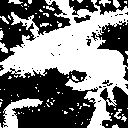

In [4]:
# Gray scale
def BGR2GRAY(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()

    # Gray scale
    out = 0.2126 * r + 0.7152 * g + 0.0722 * b
    out = out.astype(np.uint8)

    return out

# binalization
def binarization(img, th=128):
    img[img < th] = 0
    img[img >= th] = 255
    return img


# Read image
img = cv2.imread("imori.jpg").astype(np.float32)

# Grayscale
out = BGR2GRAY(img)

# Binarization
out = binarization(out)

# 画像の表示
display(Image.fromarray(out))

## Q.4. 大津の二値化

大津の二値化を実装せよ。
大津の二値化とは判別分析法と呼ばれ、二値化における分離の閾値を自動決定する手法である。
これは**クラス内分散**と**クラス間分散**の比から計算される。

グレースケールの輝度値（ピクセルの値）のヒストグラムはこうなる。

```python
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('assets/imori.jpg')
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
plt.hist(gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.xlabel('value')
plt.ylabel('appearance')
plt.show()
```

<img src="assets/histogram-Gray.jpg" width=400>

二値化はある値を境界にして、０か１にする方法だけど、

- 閾値t未満をクラス0, t以上をクラス1とする。
- w0, w1 ... 閾値tにより分離された各クラスの画素数の割合 (w0 + w1 = 1を満たす)
- S0^2, S1^2 ... 各クラスの画素値の分散
- M0, M1 ... 各クラスの画素値の平均値

<img src="assets/histogram-Gray-1.png" width=400>

とすると、

<img src="assets/otsu_binary_1.png" width=500>

となり、分離度Xは次式で定義される。

<img src="assets/otsu_binary_2.png" width=300>

<!--
```bash
クラス内分散 Sw^2 = w0 * S0^2 + w1 * S1^2
クラス間分散 Sb^2 = w0 * (M0 - Mt)^2 + w1 * (M1 - Mt)^2 = w0 * w1 * (M0 - M1) ^2
画像全体の画素の分散 St^2 = Sw^2 + Sb^2 = (const)
以上より、分離度は次式で定義される。
分離度 X = Sb^2 / Sw^2 = Sb^2 / (St^2 - Sb^2)
```
-->

となるので、

<img src="assets/otsu_binary_3.png" width=300>

<!--
```bash
argmax_{t} X = argmax_{t} Sb^2
```
-->


となる。すなわち、Sb^2 =  w0 * w1 * (M0 - M1) ^2 が最大となる、閾値tを二値化の閾値とすれば良い。

|入力 (imori.jpg)|出力 (th = 127) (answers_image/answer_4.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_4.jpg)|

threshold >> 127


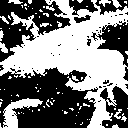

In [5]:
# Read image
img = cv2.imread("imori.jpg").astype(float)

H, W, C = img.shape

# Grayscale
out = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
out = out.astype(np.uint8)

# Determine threshold of Otsu's binarization
max_sigma = 0
max_t = 0

for _t in range(1, 255):
    v0 = out[np.where(out < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H * W)
    v1 = out[np.where(out >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * ((m0 - m1) ** 2)
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t

# Binarization
print("threshold >>", max_t)
th = max_t
out[out < th] = 0
out[out >= th] = 255

# 画像の表示
display(Image.fromarray(out))

## Q.5. HSV変換

HSV変換を実装して、色相Hを反転せよ。

HSV変換とは、**Hue(色相)**、**Saturation(彩度)**、**Value(明度)** で色を表現する手法である。

- Hue ... 色合いを0~360度で表現し、赤や青など色の種類を示す。 ( 0 <= H < 360) 色相は次の色に対応する。

```bash
赤 黄色  緑  水色  青  紫   赤
0  60  120  180 240 300 360
```

- Saturation ... 色の鮮やかさ。Saturationが低いと灰色さが顕著になり、くすんだ色となる。 ( 0<= S < 1)
- Value ... 色の明るさ。Valueが高いほど白に近く、Valueが低いほど黒に近くなる。 ( 0 <= V < 1)

RGB -> HSV変換は以下の式で定義される。

R,G,Bが[0, 1]の範囲にあるとする。

```bash
Max = max(R,G,B)
Min = min(R,G,B)

H =  { 0                            (if Min=Max)
       60 x (G-R) / (Max-Min) + 60  (if Min=B)
       60 x (B-G) / (Max-Min) + 180 (if Min=R)
       60 x (R-B) / (Max-Min) + 300 (if Min=G)
       
V = Max

S = Max - Min
```

HSV -> RGB変換は以下の式で定義される。

```bash
C = S

H' = H / 60

X = C (1 - |H' mod 2 - 1|)

(R,G,B) = (V - C) (1,1,1) + { (0, 0, 0)  (if H is undefined)
                              (C, X, 0)  (if 0 <= H' < 1)
                              (X, C, 0)  (if 1 <= H' < 2)
                              (0, C, X)  (if 2 <= H' < 3)
                              (0, X, C)  (if 3 <= H' < 4)
                              (X, 0, C)  (if 4 <= H' < 5)
                              (C, 0, X)  (if 5 <= H' < 6)
```
ここでは色相Hを反転(180を加算)し、RGBに直し画像を表示せよ。

|入力 (imori.jpg)|出力 (answers_image/answer_5.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_5.jpg)|

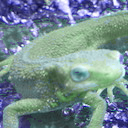

In [6]:
# Read image
img = cv2.imread("imori.jpg")
img_origin = img.copy()
img = img.astype(np.float32) / 255.
# RGB > HSV
out = np.zeros_like(img)

max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
## if min == B
ind = np.where(min_arg == 0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
## if min == R
ind = np.where(min_arg == 2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
## if min == G
ind = np.where(min_arg == 1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    
V = max_v.copy()
S = max_v.copy() - min_v.copy()

# Transpose Hue
H = (H + 180) % 360

# HSV > RGB

C = S
H_ = H // 60
X = C * (1 - np.abs( H_ % 2 - 1))
Z = np.zeros_like(H)

vals = [[Z,X,C], [Z,C,X], [X,C,Z], [C,X,Z], [C,Z,X], [X,Z,C]]

for i in range(6):
    ind = np.where((i <= H_) & (H_ < (i+1)))
    out[..., 0][ind] = (V-C)[ind] + vals[i][0][ind]
    out[..., 1][ind] = (V-C)[ind] + vals[i][1][ind]
    out[..., 2][ind] = (V-C)[ind] + vals[i][2][ind]

out[np.where(max_v == min_v)] = 0
out = (out * 255).astype(np.uint8)

# 画像の表示
display(Image.fromarray(out))

## Q.6. 減色処理

ここでは画像の値を256^3から4^3、すなわちR,G,B in {32, 96, 160, 224}の各4値に減色せよ。
これは量子化操作である。
各値に関して、以下の様に定義する。

```bash
val = {  32  (  0 <= val <  64)
         96  ( 64 <= val < 128)
        160  (128 <= val < 192)
        224  (192 <= val < 256)
```
|入力 (imori.jpg)|出力 (answers_image/answer_6.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_6.jpg)|


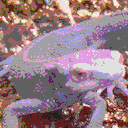

In [7]:
# Read image
img = cv2.imread("imori.jpg")

# Dicrease color
out = img.copy()

for i in range(4):
    ind = np.where(((64*i-1) <= out) & (out < (64*(i+1)-1)))
    out[ind] = 32 * (2*i+1)

# 画像の表示
display(Image.fromarray(out))

## Q.7. 平均プーリング

ここでは画像をグリッド分割(ある固定長の領域に分ける)し、かく領域内(セル)の平均値でその領域内の値を埋める。
このようにグリッド分割し、その領域内の代表値を求める操作は**Pooling(プーリング)** と呼ばれる。
これらプーリング操作は**CNN(Convolutional Neural Network)** において重要な役割を持つ。

これは次式で定義される。

```bash
v = 1/|R| * Sum_{i in R} v_i
```

ここではimori.jpgは128x128なので、8x8にグリッド分割し、平均プーリングせよ。

|入力 (imori.jpg)|出力 (answers_image/answer_7.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_7.jpg)|

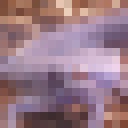

In [8]:
# Read image
img = cv2.imread("imori.jpg")

# Average Pooling
out = img.copy()

H, W, C = img.shape
G = 8
Nh = int(H / G)
Nw = int(W / G)

for y in range(Nh):
    for x in range(Nw):
        for c in range(C):
            out[G*y:G*(y+1), G*x:G*(x+1), c] = np.mean(out[G*y:G*(y+1), G*x:G*(x+1), c]).astype(int)

# 画像の表示
display(Image.fromarray(out))

## Q.8. Maxプーリング

ここでは平均値でなく最大値でプーリングせよ。

|入力 (imori.jpg)|出力 (answers_image/answer_8.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_8.jpg)|


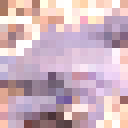

In [9]:
# Read image
img = cv2.imread("imori.jpg")

# Max Pooling
out = img.copy()

H, W, C = img.shape
G = 8
Nh = int(H / G)
Nw = int(W / G)

for y in range(Nh):
    for x in range(Nw):
        for c in range(C):
            out[G*y:G*(y+1), G*x:G*(x+1), c] = np.max(out[G*y:G*(y+1), G*x:G*(x+1), c])

# 画像の表示
display(Image.fromarray(out))

## Q.9. ガウシアンフィルタ

ガウシアンフィルタ(3x3、標準偏差1.3)を実装し、*imori_noise.jpg*のノイズを除去せよ。

ガウシアンフィルタとは画像の**平滑化**（滑らかにする）を行うフィルタの一種であり、**ノイズ除去**にも使われる。

ノイズ除去には他にも、メディアンフィルタ(Q.10)、平滑化フィルタ(Q.11)、LoGフィルタ(Q.19)などがある。

ガウシアンフィルタは注目画素の周辺画素を、ガウス分布による重み付けで平滑化し、次式で定義される。
このような重みは**カーネル**や**フィルタ**と呼ばれる。

ただし、画像の端はこのままではフィルタリングできないため、画素が足りない部分は0で埋める。これを**0パディング**と呼ぶ。
かつ、重みは正規化する。(sum g = 1)

重みはガウス分布から次式になる。

<img src='assets/gaussian_filter.png' width=200>

```bash
重み g(x,y,s) = 1/ (2 * pi * sigma * sigma) * exp( - (x^2 + y^2) / (2*s^2))
標準偏差s = 1.3による8近傍ガウシアンフィルタは
            1 2 1
K =  1/16 [ 2 4 2 ]
            1 2 1
```

|入力 (imori_noise.jpg)|出力 (answers_image/answer_9.jpg)|
|:---:|:---:|
|![](imori_noise.jpg)|![](answers_image/answer_9.jpg)|


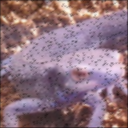

In [10]:
# Read image
img = cv2.imread("imori_noise.jpg")
H, W, C = img.shape


# Gaussian Filter
K_size = 3
sigma = 1.3

## Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(float)

## Kernel
K = np.zeros((K_size, K_size), dtype=float)
for x in range(-pad, -pad+K_size):
    for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = np.exp( -(x**2 + y**2) / (2* (sigma**2)))
K /= (sigma * np.sqrt(2 * np.pi))
K /= K.sum()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y, pad+x, c] = np.sum(K * out[y:y+K_size, x:x+K_size, c])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

# 画像の表示
display(Image.fromarray(out))

## Q.10 メディアンフィルタ

メディアンフィルタ(3x3)を実装し、*imori_noise.jpg*のノイズを除去せよ。

メディアンフィルタとは画像の平滑化を行うフィルタの一種である。

これは注目画素の3x3の領域内の、メディアン値(中央値)を出力するフィルタである。
これもゼロパディングせよ。

|入力 (imori_noise.jpg)|出力 (answers_image/answer_10.jpg)|
|:---:|:---:|
|![](imori_noise.jpg)|![](answers_image/answer_10.jpg)|

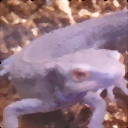

In [11]:
# Read image
img = cv2.imread("imori_noise.jpg")
H, W, C = img.shape


# Median Filter
K_size = 3

## Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(float)


for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y, pad+x, c] = np.median(out[y:y+K_size, x:x+K_size, c])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

# 画像の表示
display(Image.fromarray(out))